<a href="https://colab.research.google.com/github/hwankang/Reinforce-L/blob/main/TF_RL_Intro_DQN_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5_%EA%B0%9C%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2021 The TF-Agents Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TF RL Intro DQN 강화학습 개론
* Author: TF Team
* Lecture: Jason Dong(naebon1@gmail.com), 2021.1.15, KIDET 

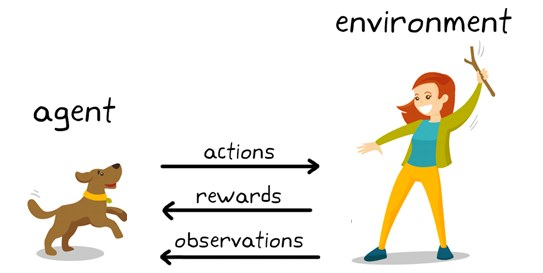

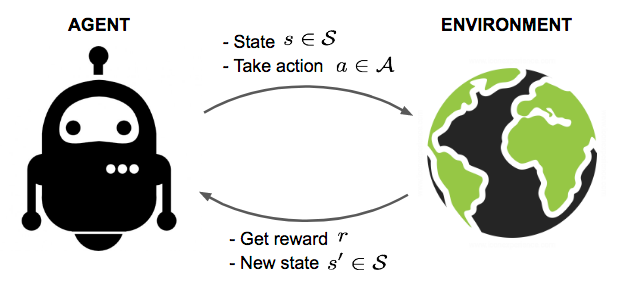

## RL, 강화학습 개요 
* 에이전트가 
* 보상을 극대화하기 위해 
* 주어진 환경에서 
* 행동하는 방법을 배우는 
* 범용 학습 프레임워크
* 다양한 순차적 의사결정문제 모델링에 유용

### 2가지 주요 구성요소
* 환경: 해결해야 할 문제
* 에이전트: 학습 알고리즘
* 에이전트와 환경은 지속적으로 상호작용
* 각 시간마다 에이전트는 
* 정책에 따라 작업을 수행

### 학습목표 
* 보상 합계 극대화 위한 
* 정책의 개선

* 정책 pi(a t | s t), a t: 행동, s t: 상태, r t+1: 보상
* s t: 상태 - 환경의 현재 관측치

## 강화학습의 개요 / Introduction

* Reinforcement learning (RL) is a general framework where agents learn to perform actions in an environment so as to maximize a reward. The two main components are the environment, which represents the problem to be solved, and the agent, which represents the learning algorithm.

* The agent and environment continuously interact with each other. At each time step, the agent takes an action on the environment based on its *policy* $\pi(a_t|s_t)$, where $s_t$ is the current observation from the environment, and receives a reward $r_{t+1}$ and the next observation $s_{t+1}$ from the environment. The goal is to improve the policy so as to maximize the sum of rewards (return).

* Note: It is important to distinguish between the `state` of the environment and the `observation`, which is the part of the environment `state` that the agent can see, e.g. in a poker game, the environment state consists of the cards belonging to all the players and the community cards, but the agent can observe only its own cards and a few community cards. In most literature, these terms are used interchangeably and observation is also denoted as $s$.

![Agent-Environment Interation Loop](https://github.com/tensorflow/agents/blob/master/docs/tutorials/images/rl_overview.png?raw=1)

This is a very general framework and can model a variety of sequential decision making problems such as games, robotics etc. 


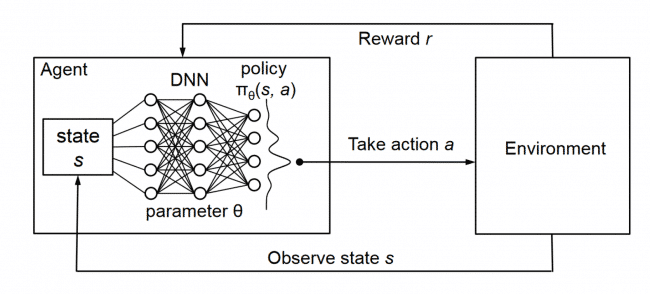

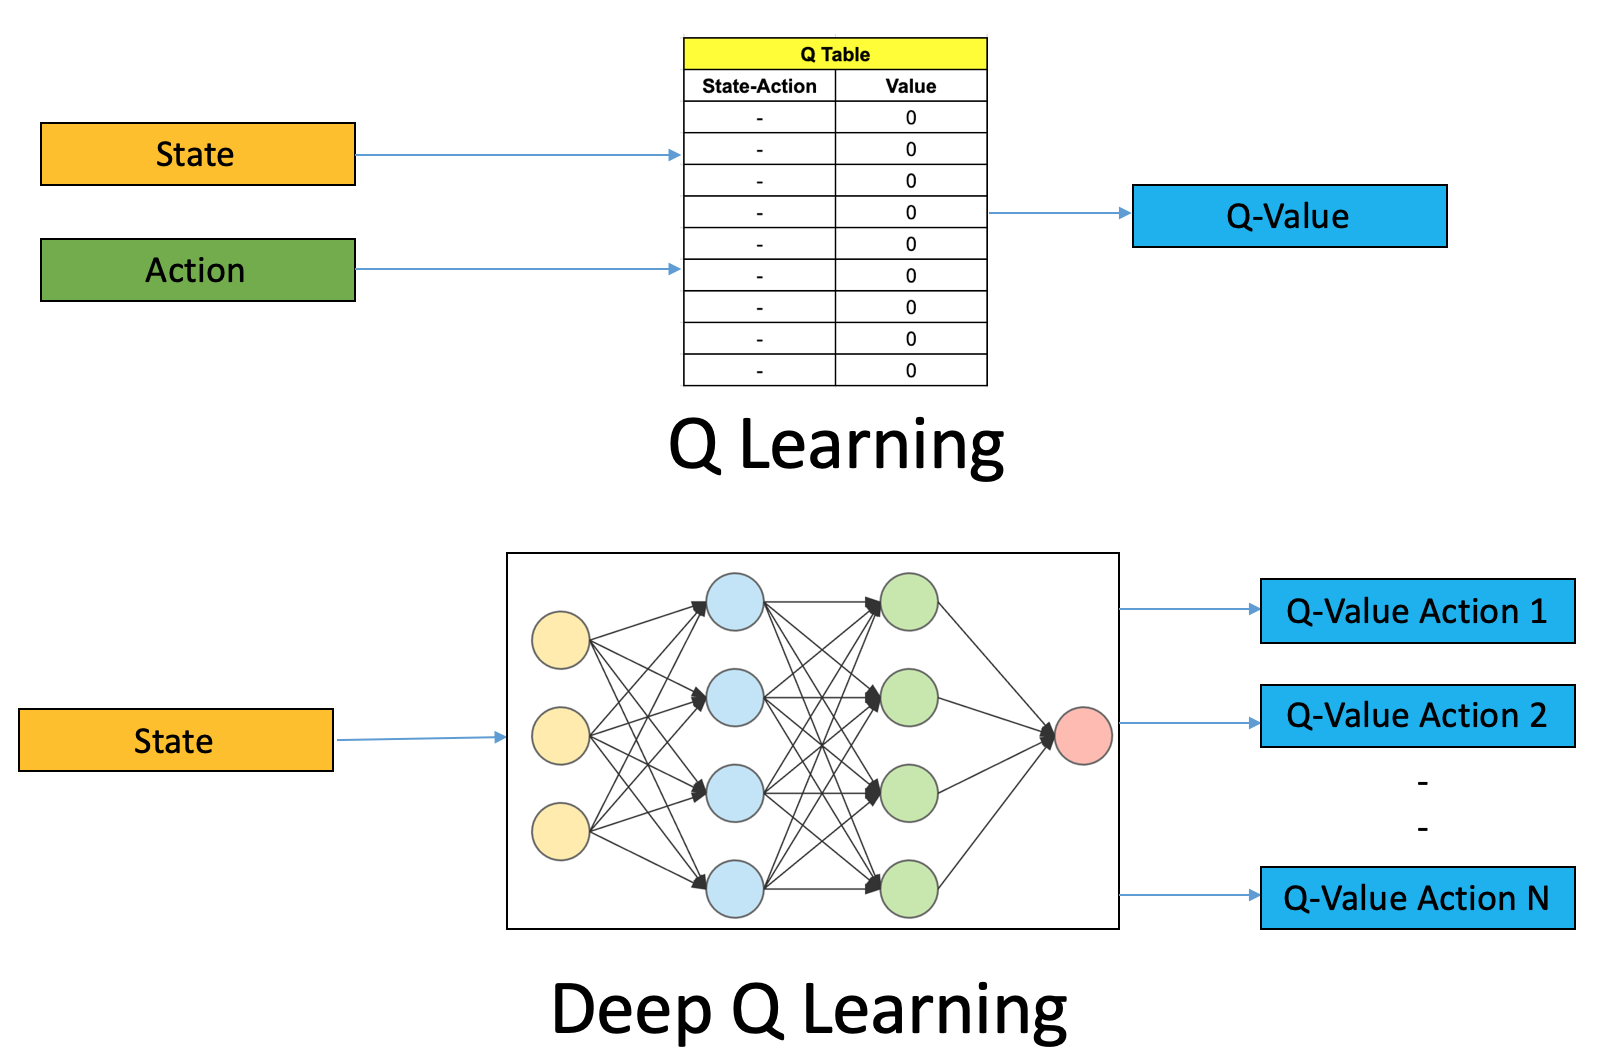

## Cartpole 환경
* 대표적인 강화학습 기초문제
* 마찰이 없는 트랙을 따라 이동할 수 있는 카트에 기둥 부착
* 장대를 똑바로 세우고 카트를 제어하여, 넘어지는 것을 방지하는 목표
* s: 상태 관측치는 카트의 위치와 속도, 극의 각도와 각속도를 나타내는 4D 벡터
* a: 에이전트는 카트를 오른쪽 (+1) 또는 왼쪽 (-1)으로 밀기 등 두 가지 동작 중 하나를 수행하여 시스템을 제어
* r: 막대가 똑바로 유지되는 모든 시간 단계에 대해 1의 보상 제공

### 에피소드 종료 조건
* 극 팁이 각도 제한을 초과
* 카트가 경계 밖으로 이동
* 반복시행 횟수 초과

### 에이전트의 목표
* 정책을 학습, 
* 에피소드에서 보상 합계를 최대화
* 이 때, gamma로 향후 보상을 할인
* 즉각적인 보상에 좀 더 집중 >> 정책에 집중

## The Cartpole Environment

The Cartpole environment is one of the most well known classic reinforcement learning problems ( the *"Hello, World!"* of RL). A pole is attached to a cart, which can move along a frictionless track. The pole starts upright and the goal is to prevent it from falling over by controlling the cart.  

*   The observation from the environment $s_t$ is a 4D vector representing the position and velocity of the cart, and the angle and angular velocity of the pole. 
*   The agent can control the system by taking one of 2 actions $a_t$: push the cart right (+1) or left (-1). 
*   A reward $r_{t+1} = 1$ is provided for every timestep that the pole remains upright. The episode ends when one of the following is true:
  * the pole tips over some angle limit
  * the cart moves outside of the world edges
  * 200 time steps pass. 

The goal of the agent is to learn a policy $\pi(a_t|s_t)$ so as to maximize the sum of rewards in an episode $\sum_{t=0}^{T} \gamma^t r_t$. Here $\gamma$ is a discount factor in $[0, 1]$ that discounts future rewards relative to immediate rewards. This parameter helps us focus the policy, making it care more about obtaining rewards quickly.


## DQN (Deep Q-Network) 알고리즘
* 2015년 DeepMind에서 개발
* 강화학습과 심층신경망을 결합
* 광범위한 Atari 게임을 해결 (초인간 수준)
* Q-Learning이라는 고전적인 RL 알고리즘에 
* 심층 신경망과 경험 재생이라는 기술을 결합

### Q러닝
* Q러닝은 Q함수의 개념 기반
* Q함수 (상태-행동 가치 함수)
* s에서 얻은 보상의 예상수익을 측정
* 최적의 Q 함수:
* 관찰 >> 동작 >> 최적의 정책 >> 보상의 최대화
* Bellman 최적성 방정식

### 딥Q러닝
* Q러닝은 욕심 많은 정책 a = max Q (s, a; theta)에 대해 학습하면서 
* 환경에서 행동 / 데이터 수집을 위해 
* 다른 행동 정책을 사용하는 
* '정책을 벗어난 알고리즘'
 * epsilon-greedy 정책: 1 - epsilon 확률로 그리디 행동 선택   
 * epsilon 확률의 무작위 행동: 양질의 상태-행동 공간 보장

### * 리플레이 체험
* Atari DQN 작업
* 안정적인 네트워크 업데이트를 위해 
* Experience Replay 기술 도입
* 많은 업데이트에서 각 전환을 재사용하여 데이터 효율성 증대
* 상관 관계가없는 전환을 일괄 적으로 사용하여 안정성을 제고

## The DQN Agent

The  [DQN (Deep Q-Network) algorithm](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) was developed by DeepMind in 2015. It was able to solve a wide range of Atari games (some to superhuman level) by combining reinforcement learning and deep neural networks at scale. The algorithm was developed by enhancing a classic RL algorithm called Q-Learning with deep neural networks and a technique called *experience replay*.

### Q-Learning

Q-Learning is based on the notion of a Q-function. The Q-function (a.k.a the state-action value function) of a policy $\pi$, $Q^{\pi}(s, a)$, measures the expected return or discounted sum of rewards obtained from state $s$ by taking action $a$ first and following policy $\pi$ thereafter. We define the optimal Q-function $Q^*(s, a)$ as the maximum return that can be obtained starting from observation $s$, taking action $a$ and following the optimal policy thereafter. The optimal Q-function obeys the following *Bellman* optimality equation: 

$\begin{equation}Q^\ast(s, a) = \mathbb{E}[ r + \gamma \max_{a'} Q^\ast(s', a') ]\end{equation}$

This means that the maximum return from state $s$ and action $a$ is the sum of the immediate reward $r$ and the return (discounted by $\gamma$) obtained by following the optimal policy thereafter until the end of the episode (i.e., the maximum reward from the next state $s'$). The expectation is computed both over the distribution of immediate rewards $r$ and possible next states $s'$.

The basic idea behind Q-Learning is to use the Bellman optimality equation as an iterative update $Q_{i+1}(s, a) \leftarrow \mathbb{E}\left[ r + \gamma \max_{a'} Q_{i}(s', a')\right]$, and it can be shown that this converges to the optimal $Q$-function, i.e. $Q_i \rightarrow Q^*$ as $i \rightarrow \infty$ (see the [DQN paper](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)).


### Deep Q-Learning

For most problems, it is impractical to represent the $Q$-function as a table containing values for each combination of $s$ and $a$. Instead, we train a function approximator, such as a neural network with parameters $\theta$, to estimate the Q-values, i.e. $Q(s, a; \theta) \approx Q^*(s, a)$. This can done by minimizing the following loss at each step $i$:

$\begin{equation}L_i(\theta_i) = \mathbb{E}_{s, a, r, s'\sim \rho(.)} \left[ (y_i - Q(s, a; \theta_i))^2 \right]\end{equation}$ where $y_i = r +  \gamma \max_{a'} Q(s', a'; \theta_{i-1})$

Here, $y_i$ is called the TD (temporal difference) target, and $y_i - Q$ is called the TD error. $\rho$ represents the behaviour distribution, the distribution over transitions $\{s, a, r, s'\}$ collected from the environment. 

Note that the parameters from the previous iteration $\theta_{i-1}$ are fixed and not updated. In practice we use a snapshot of the network parameters from a few iterations ago instead of the last iteration. This copy is called the *target network*.

Q-Learning is an *off-policy* algorithm that learns about the greedy policy $a = \max_{a} Q(s, a; \theta)$ while using a different behaviour policy for acting in the environment/collecting data. This behaviour policy is usually an $\epsilon$-greedy policy that selects the greedy action with probability $1-\epsilon$ and a random action with probability $\epsilon$ to ensure good coverage of the state-action space.

### Experience Replay

To avoid computing the full expectation in the DQN loss, we can minimize it using stochastic gradient descent. If the loss is computed using just the last transition $\{s, a, r, s'\}$, this reduces to standard Q-Learning. 

The Atari DQN work introduced a technique called Experience Replay to make the network updates more stable. At each time step of data collection, the transitions are added to a circular buffer called the *replay buffer*. Then during training, instead of using just the latest transition to compute the loss and its gradient, we compute them using a mini-batch of transitions sampled from the replay buffer. This has two advantages: better data efficiency by reusing each transition in many updates, and better stability using uncorrelated transitions in a batch.


## NXP RL 강화학습 활용예제: OpenAI Gym 시리즈1. 막대 중심잡기
https://drive.google.com/file/d/1NIIzye3rkAKXX20PaJ-e6IExm-HkaOBc/view?usp=sharing

## TF RL DQN Cartpole
https://colab.research.google.com/drive/15UnjPUWXnI3q6vG_1Fr5SssXTL7ZYn00?usp=sharing


## DQN on Cartpole in TF-Agents

TF-Agents provides all the components necessary to train a DQN agent, such as the agent itself, the environment, policies, networks, replay buffers, data collection loops, and metrics. These components are implemented as Python functions or TensorFlow graph ops, and we also have wrappers for converting between them. Additionally, TF-Agents supports TensorFlow 2.0 mode, which enables us to use TF in imperative mode. 

Next, take a look at the [tutorial for training a DQN agent on the Cartpole environment using TF-Agents](https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb).


